In [1]:
import sys
sys.path.append("../")  # import path starts with src/
from preprocessing.create_train_test_dicts import build_splits
data = build_splits()
train_split = data['train_numeric']
val_split   = data['val_numeric']

# Convert dicts → X, y 
from preprocessing.knn_preprocess import dict_to_xy
X_train, y_train = dict_to_xy(train_split)
X_val,   y_val   = dict_to_xy(val_split)



metrics = [
    "accuracy",
    "f1_macro",
    "f1_weighted",
    "precision_macro",
    "precision_weighted",
    "recall_macro",
    "recall_weighted",
]

pca_dims = [25, 50, 75, 100, 150]          # change if you like
k_values = range(1, 31)            # k = 1..30
weights  = "distance"              # or "uniform"

all_results = {}  # metric_name -> results dict




Running KNN + PCA grid search using metric = accuracy

=== PCA dim = 25 ===

Best k based on accuracy: 27 (score=0.3957)

=== PCA dim = 50 ===

Best k based on accuracy: 8 (score=0.3992)

=== PCA dim = 75 ===

Best k based on accuracy: 6 (score=0.3848)

=== PCA dim = 100 ===

Best k based on accuracy: 6 (score=0.3708)

=== PCA dim = 150 ===

Best k based on accuracy: 1 (score=0.3384)


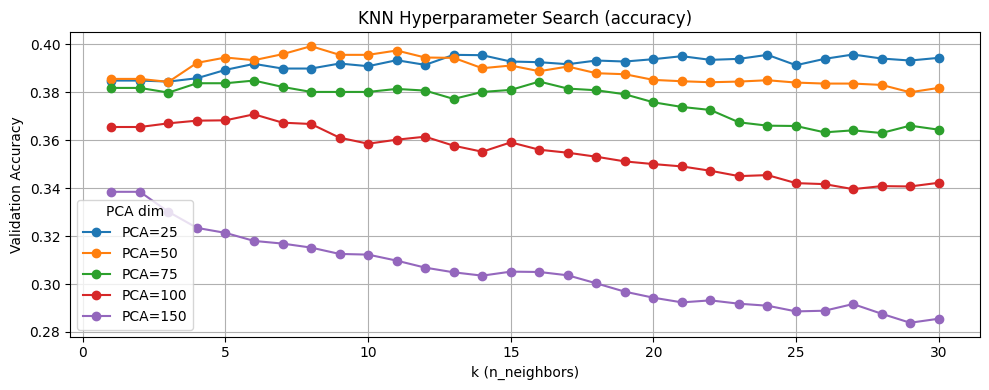


Running KNN + PCA grid search using metric = f1_macro

=== PCA dim = 25 ===

Best k based on f1_macro: 1 (score=0.3857)

=== PCA dim = 50 ===

Best k based on f1_macro: 5 (score=0.3888)

=== PCA dim = 75 ===

Best k based on f1_macro: 1 (score=0.3808)

=== PCA dim = 100 ===

Best k based on f1_macro: 6 (score=0.3719)

=== PCA dim = 150 ===

Best k based on f1_macro: 1 (score=0.3452)


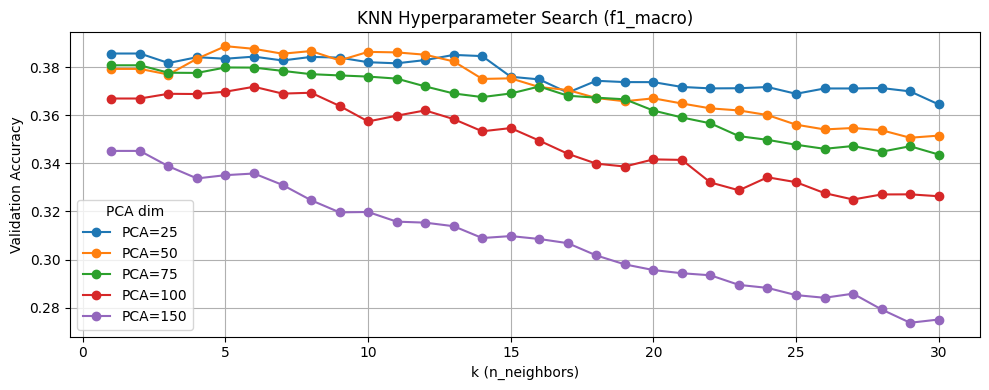


Running KNN + PCA grid search using metric = f1_weighted

=== PCA dim = 25 ===

Best k based on f1_weighted: 6 (score=0.3877)

=== PCA dim = 50 ===

Best k based on f1_weighted: 8 (score=0.3943)

=== PCA dim = 75 ===

Best k based on f1_weighted: 6 (score=0.3833)

=== PCA dim = 100 ===

Best k based on f1_weighted: 6 (score=0.3712)

=== PCA dim = 150 ===

Best k based on f1_weighted: 1 (score=0.3381)


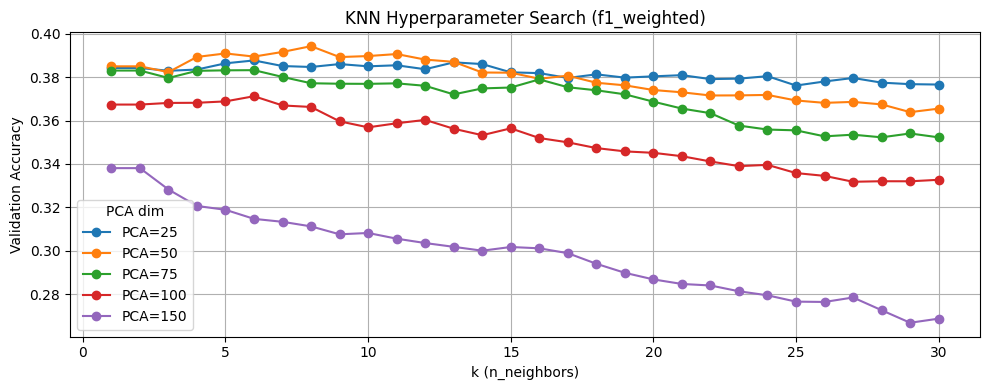


Running KNN + PCA grid search using metric = precision_macro

=== PCA dim = 25 ===

Best k based on precision_macro: 29 (score=0.4750)

=== PCA dim = 50 ===

Best k based on precision_macro: 28 (score=0.4807)

=== PCA dim = 75 ===

Best k based on precision_macro: 29 (score=0.4901)

=== PCA dim = 100 ===

Best k based on precision_macro: 30 (score=0.5084)

=== PCA dim = 150 ===

Best k based on precision_macro: 27 (score=0.5074)


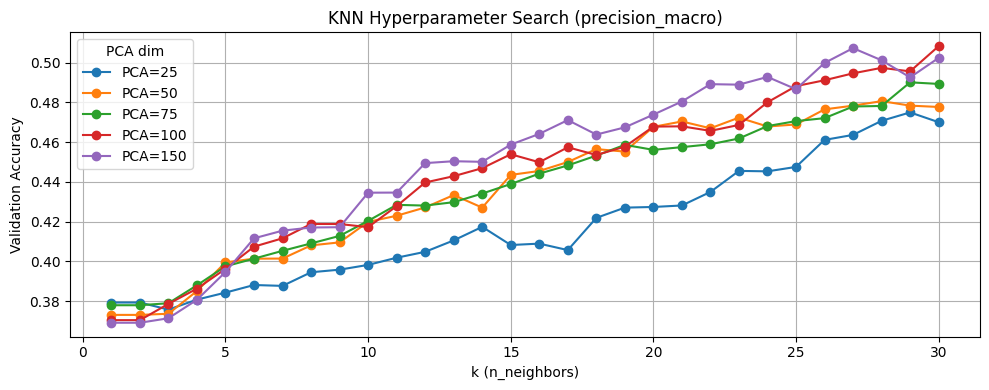


Running KNN + PCA grid search using metric = precision_weighted

=== PCA dim = 25 ===

Best k based on precision_weighted: 30 (score=0.4031)

=== PCA dim = 50 ===

Best k based on precision_weighted: 30 (score=0.4232)

=== PCA dim = 75 ===

Best k based on precision_weighted: 29 (score=0.4301)

=== PCA dim = 100 ===

Best k based on precision_weighted: 30 (score=0.4312)

=== PCA dim = 150 ===

Best k based on precision_weighted: 27 (score=0.4317)


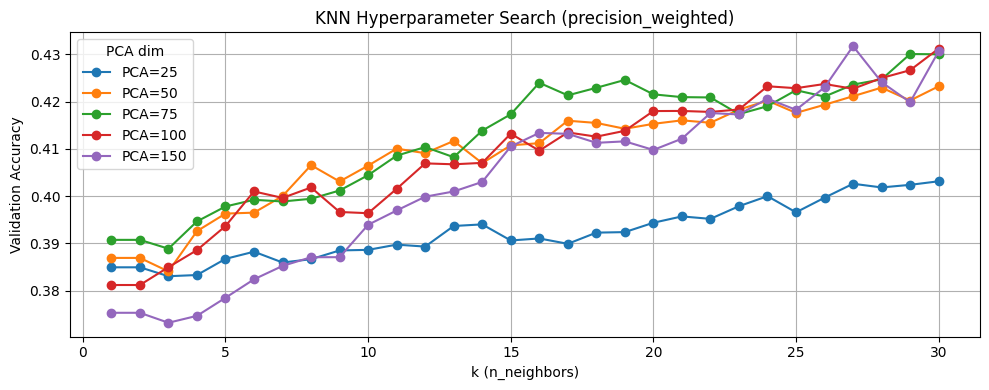


Running KNN + PCA grid search using metric = recall_macro

=== PCA dim = 25 ===

Best k based on recall_macro: 1 (score=0.3951)

=== PCA dim = 50 ===

Best k based on recall_macro: 1 (score=0.3917)

=== PCA dim = 75 ===

Best k based on recall_macro: 1 (score=0.3940)

=== PCA dim = 100 ===

Best k based on recall_macro: 1 (score=0.3762)

=== PCA dim = 150 ===

Best k based on recall_macro: 1 (score=0.3534)


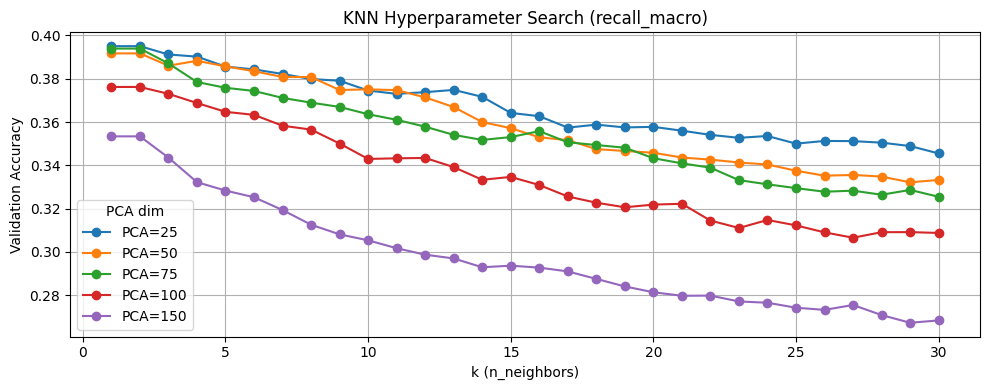


Running KNN + PCA grid search using metric = recall_weighted

=== PCA dim = 25 ===

Best k based on recall_weighted: 27 (score=0.3957)

=== PCA dim = 50 ===

Best k based on recall_weighted: 8 (score=0.3992)

=== PCA dim = 75 ===

Best k based on recall_weighted: 6 (score=0.3848)

=== PCA dim = 100 ===

Best k based on recall_weighted: 6 (score=0.3708)

=== PCA dim = 150 ===

Best k based on recall_weighted: 1 (score=0.3384)


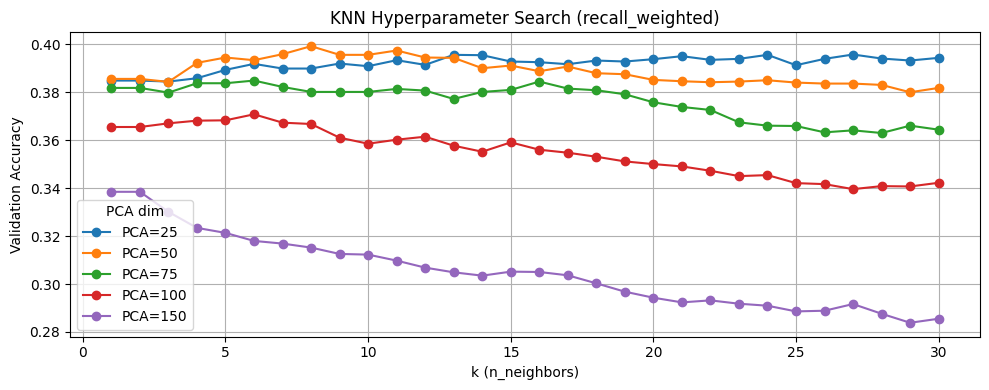


Done. `all_results` now contains results for all metrics.


In [2]:
# Cell 2: run grid search + plot for each metric
from scripts.knn_param_search import knn_pca_grid_search, plot_knn_pca_grid
for metric in metrics:
    print("\n" + "=" * 70)
    print(f"Running KNN + PCA grid search using metric = {metric}")
    print("=" * 70)

    results = knn_pca_grid_search(
        X_train, y_train,
        X_val,   y_val,
        pca_dims=pca_dims,
        k_values=k_values,
        weights=weights,
        metric=metric,          # <--- key line
    )

    all_results[metric] = results

    title = f"KNN Hyperparameter Search ({metric})"
    plot_knn_pca_grid(results, title=title)

print("\nDone. `all_results` now contains results for all metrics.")


In [3]:
for metric, res in all_results.items():
    best = res["global_best"]
    print(
        f"{metric:18s} -> "
        f"PCA={best['pca_dim']:3d}, k={best['k']:2d}, score={best['acc']:.4f}"
    )


accuracy           -> PCA= 50, k= 8, score=0.3992
f1_macro           -> PCA= 50, k= 5, score=0.3888
f1_weighted        -> PCA= 50, k= 8, score=0.3943
precision_macro    -> PCA=100, k=30, score=0.5084
precision_weighted -> PCA=150, k=27, score=0.4317
recall_macro       -> PCA= 25, k= 1, score=0.3951
recall_weighted    -> PCA= 50, k= 8, score=0.3992
